# Fake News Detection
Members: 
Rahul Kumar
Priyanka Jha (Kumari)



## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.8.0
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm==3.7.0
!pip install plotly


zsh:1: command not found: python


## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations
from IPython.display import display
from sklearn.model_selection import train_test_split

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [3]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [4]:
# Import the first file - True.csv
true_news_df = pd.read_csv('True.csv')

# Import the second file - Fake.csv
fake_news_df = pd.read_csv('Fake.csv')


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [5]:
# Inspect the DataFrame with True News to understand the given data
# Display the first 5 rows
display(true_news_df.head())
# Show data types and non-null counts
display(true_news_df.info())
# Show basic statistics for numerical columns (if any)
display(true_news_df.describe())

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


None

title  \
count                                                  21417   
unique                                                 20826   
top     Factbox: Trump fills top jobs for his administration   
freq                                                      14   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   text  \
count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [6]:
# Inspect the DataFrame with Fake News to understand the given data
# Display the first 5 rows
display(fake_news_df.head())
# Show data types and non-null counts
display(fake_news_df.info())
# Show basic statistics for numerical columns (if any)
display(fake_news_df.describe())


title  \
0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
2   Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
3               Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)   
4                       Pope Francis Just Called Out Donald Trump During His Christmas Speech   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


None

title  \
count                                                                                                   23502   
unique                                                                                                  17914   
top     MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead   
freq                                                                                                        6   

         text          date  
count   23502         23481  
unique  17466          1692  
top            May 10, 2017  
freq      626            46

In [7]:
# Print the column details for True News DataFrame
# Show column names
display(true_news_df.columns)

Index(['title', 'text', 'date'], dtype='object')

In [8]:
# Print the column details for Fake News Dataframe
# Show column names
display(fake_news_df.columns)


Index(['title', 'text', 'date'], dtype='object')

In [9]:
# Print the column names of both DataFrames
print("True News DataFrame columns:", true_news_df.columns.tolist())
print("Fake News DataFrame columns:", fake_news_df.columns.tolist())


True News DataFrame columns: ['title', 'text', 'date']
Fake News DataFrame columns: ['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [10]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_news_df['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_news_df['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [11]:
# Combine the true and fake news DataFrames into a single DataFrame
news_df = pd.concat([true_news_df, fake_news_df], ignore_index=True)

In [12]:
# Display the first 5 rows of the combined DataFrame to verify the result
display(news_df.head())

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [13]:
# Check Presence of Null Values
# Check for null values in each column
print(news_df.isnull().sum())

title         21
text          21
date          42
news_label     0
dtype: int64


In [14]:
# Handle Rows with Null Values
# Drop rows with any null values
news_df = news_df.dropna()

# Verify that null values are handled
print(news_df.isnull().sum())


title         0
text          0
date          0
news_label    0
dtype: int64


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [15]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space

# Combine 'title' and 'text' columns into 'news_text'
news_df['news_text'] = news_df['title'].astype(str) + ' ' + news_df['text'].astype(str)

# Drop the original 'title', 'text', and 'date' columns
final_news_df = news_df.drop(['title', 'text', 'date'], axis=1)

# Display the first 5 rows to verify
display(final_news_df.head())

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [16]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed

# Add 'news_label' column to the new dataframe for topic identification


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [17]:
# Write the function here to clean the text and remove all the unnecessary elements

import re
import string

# Function to clean text
def clean_text(text):
    # Convert to lower case
    text = text.lower()
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove words with numbers
    text = re.sub(r'\w*\d\w*', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text




#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [18]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame

# Create df_clean with cleaned text and news_label
df_clean = final_news_df[['news_text', 'news_label']].copy()
# Apply the clean_text function to the news_text column and store in cleaned_text
df_clean['cleaned_text'] = df_clean['news_text'].apply(clean_text)
df_clean = df_clean[['cleaned_text', 'news_label']]


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [19]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
import pandas as pd
from tqdm import tqdm

# Use tqdm for progress bar
tqdm.pandas()

def lemmatize_nouns_pipe(texts):
    results = []
    for doc in nlp.pipe(texts, batch_size=1000, disable=["ner", "parser"]):
        lemmas = [token.lemma_ for token in doc if not token.is_stop and token.pos_ == "NOUN"]
        results.append(" ".join(lemmas))
    return results


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [20]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
# Apply to your DataFrame
df_clean['lemmatized_text'] = lemmatize_nouns_pipe(df_clean['cleaned_text'])
# Now df_clean contains both 'cleaned_text' and 'lemmatized_text' columns for further analysis


### Save the Cleaned data as a csv file (Recommended)

In [21]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [22]:
# Check the first few rows of the DataFrame
display(df_clean.head())

cleaned_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            as us budget fight looms republicans flip their fiscal script washington reuters the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a “fiscal conservative” on sunday and urged budget restraint in in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs’ “face the nation” drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense “discretionary” spending on programs that support education scientific research infrastructure public health and environmental protection “the trump administration has already been willing to say ‘we’re going to increase nondefense discretionary spending by about percent’” meadows chairman of the small but influential house freedom caucus said on the program “now democrats are saying that’s not enough we need to give the government a pay raise of to percent for a fiscal conservative i don’t see where the rationale is eventually you run out of other people’s money” he said meadows was among republicans who voted in late december for their party’s debtfinanced tax overhaul which is expected to balloon the federal budget deficit and add about trillion over years to the trillion national debt “it’s interesting to hear mark talk about fiscal responsibility” democratic us representative joseph crowley said on cbs crowley said the republican tax bill would require the united states to borrow trillion to be paid off by future generations to finance tax cuts for corporations and the rich “this is one of the least fiscally responsible bills we’ve ever seen passed in the history of the house of representatives i think we’re going to be paying for this for many many years to come” crowley said republicans insist the tax package the biggest us tax overhaul in more than years will boost the economy and job growth house speaker paul ryan who also supported the tax bill recently went further than meadows making clear in a radio interview that welfare or “entitlement reform” as the party often calls it would be a top republican priority in in republican parlance “entitlement” programs mean food stamps housing assistance medicare and medicaid health insurance for the elderly poor and disabled as well as other programs created by washington to assist the needy democrats seized on ryan’s early december remarks saying they showed republicans would try to pay for their tax overhaul by seeking spending cuts for social programs but the goals of house republicans may have to take a back seat to the senate where the votes of some democrats will be needed to approve a budget and prevent a government shutdown democrats will use their leverage in the senate which republicans narrowly control to defend both discretionary nondefense programs and social spending while tackling the issue of the “dreamers” people brought illegally to the country as children trump in september put a march expiration dat

In [23]:
# Check the dimensions of the DataFrame
print("Shape of the DataFrame:", df_clean.shape)


Shape of the DataFrame: (44898, 3)


In [24]:
# Check the number of non-null entries and data types of each column
print("DataFrame Info:")
df_clean.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cleaned_text     44889 non-null  object
 1   news_label       44898 non-null  int64 
 2   lemmatized_text  44877 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [25]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data

# Split the DataFrame into 70% train and 30% validation data
train_df, val_df = train_test_split(df_clean, test_size=0.3, random_state=42, stratify=df_clean['news_label'])

# Check the shape of the resulting DataFrames
print("Training set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)

Training set shape: (31428, 3)
Validation set shape: (13470, 3)


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [26]:
# Add a new column to calculate the character length of cleaned news text
train_df['cleaned_text_length'] = train_df['cleaned_text'].str.len()

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['lemmatized_text_length'] = train_df['lemmatized_text'].str.len()


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

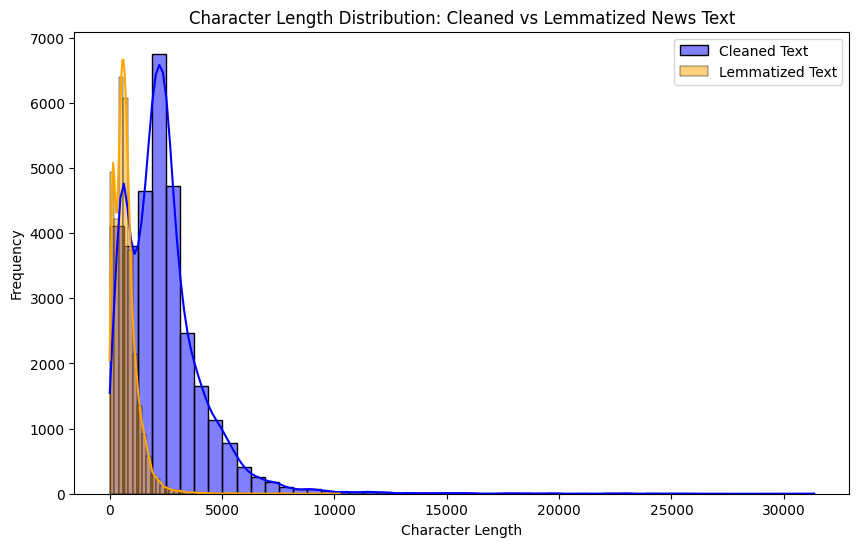

In [27]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train_df['cleaned_text_length'], color='blue', label='Cleaned Text', kde=True, bins=50, alpha=0.5)
sns.histplot(train_df['lemmatized_text_length'], color='orange', label='Lemmatized Text', kde=True, bins=50, alpha=0.5)
plt.title('Character Length Distribution: Cleaned vs Lemmatized News Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

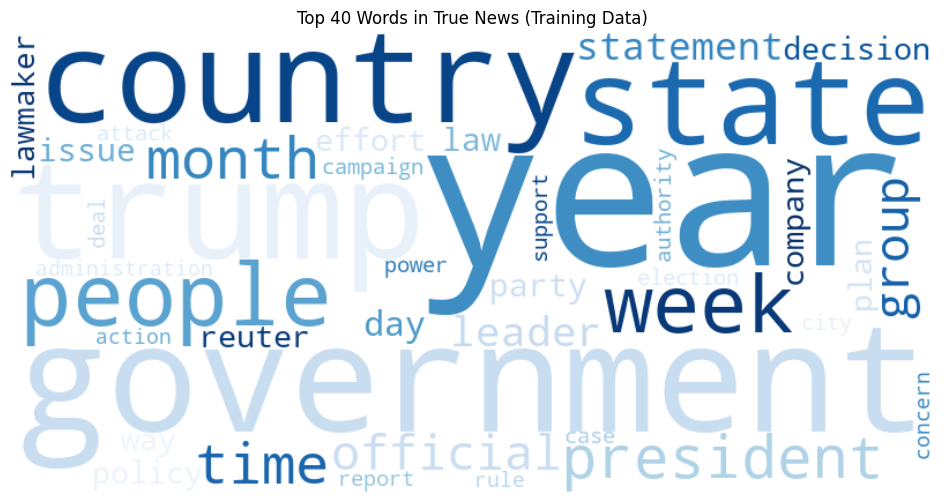

In [28]:
from wordcloud import WordCloud

# Filter true news and combine all lemmatized text into one string
true_news_text = train_df[train_df['news_label'] == 1]['lemmatized_text'].dropna().astype(str).str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=40, background_color='white', colormap='Blues').generate(true_news_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News (Training Data)')
plt.show()


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

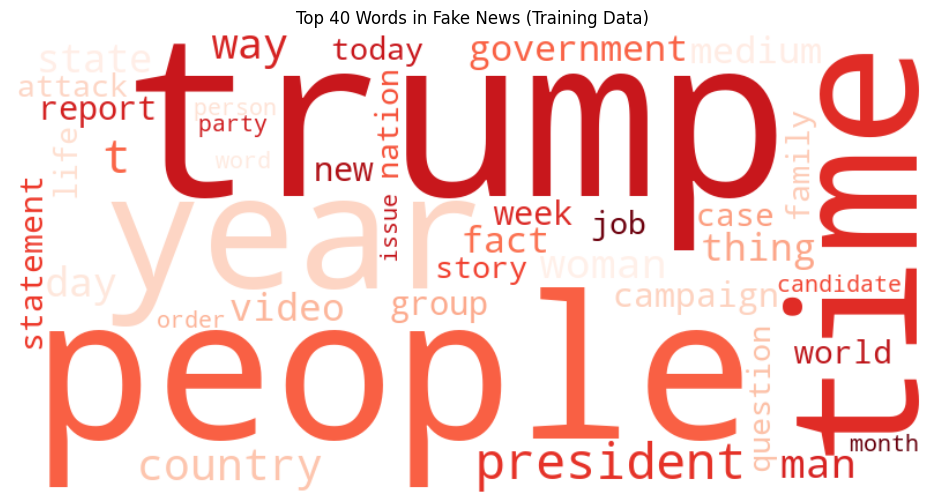

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter fake news and combine all lemmatized text into one string
fake_news_text = train_df[train_df['news_label'] == 0]['lemmatized_text'].dropna().astype(str).str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=40, background_color='white', colormap='Reds').generate(fake_news_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News (Training Data)')
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [30]:
# Write a function to get the specified top n-grams
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(text_series, ngram_range=(1,1), top_n=10):
    # Remove NaN values and convert to string
    text_series = text_series.dropna().astype(str)
    # Initialize CountVectorizer for the given n-gram range
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(text_series)
    # Sum up the counts of each n-gram
    ngram_counts = X.sum(axis=0).A1
    ngrams = vectorizer.get_feature_names_out()
    # Create a DataFrame for sorting
    ngram_freq = pd.DataFrame({'ngram': ngrams, 'count': ngram_counts})
    # Sort and return the top n
    return ngram_freq.sort_values(by='count', ascending=False).head(top_n)


##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [31]:
# Handle NaN values in the text data
# Option 1: Drop NaN values
text_series = train_df['news_label'].dropna()

# Option 2: Fill NaN values with empty string
text_series = train_df['news_label'].fillna('')


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

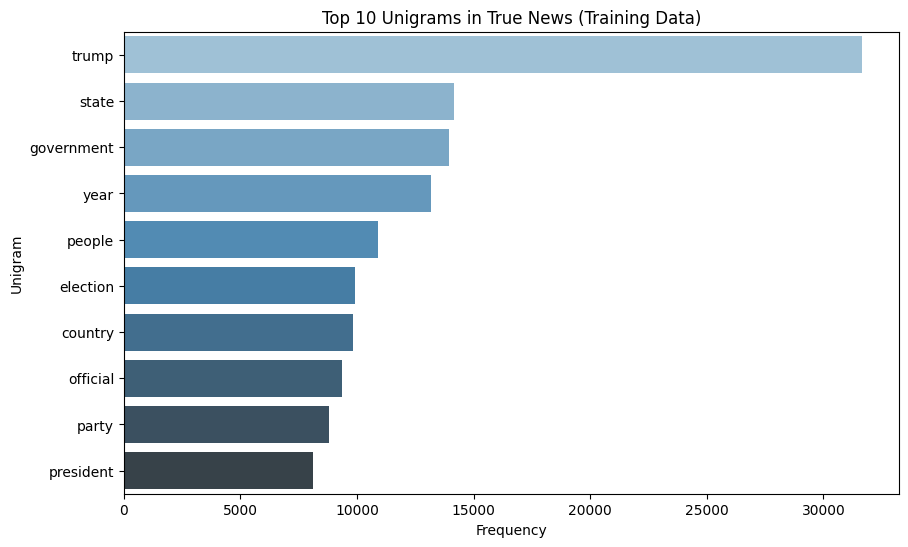

In [32]:
# Filter lemmatized text for true news
true_news_unigrams = train_df[train_df['news_label'] == 1]['lemmatized_text']

# Get top 10 unigrams
top10_unigrams = get_top_ngrams(true_news_unigrams, ngram_range=(1,1), top_n=10)

# Plot as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_unigrams, x='count', y='ngram', palette='Blues_d')
plt.title('Top 10 Unigrams in True News (Training Data)')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.show()


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



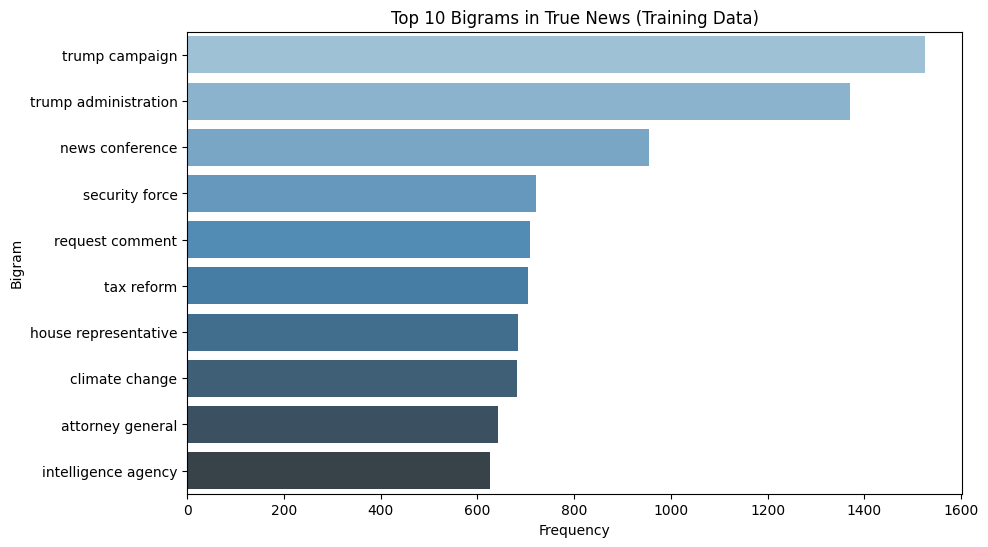

In [33]:
# Filter lemmatized text for true news
true_news_bigrams = train_df[train_df['news_label'] == 1]['lemmatized_text']

# Get top 10 bigrams
top10_bigrams = get_top_ngrams(true_news_bigrams, ngram_range=(2,2), top_n=10)

# Plot as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_bigrams, x='count', y='ngram', palette='Blues_d')
plt.title('Top 10 Bigrams in True News (Training Data)')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



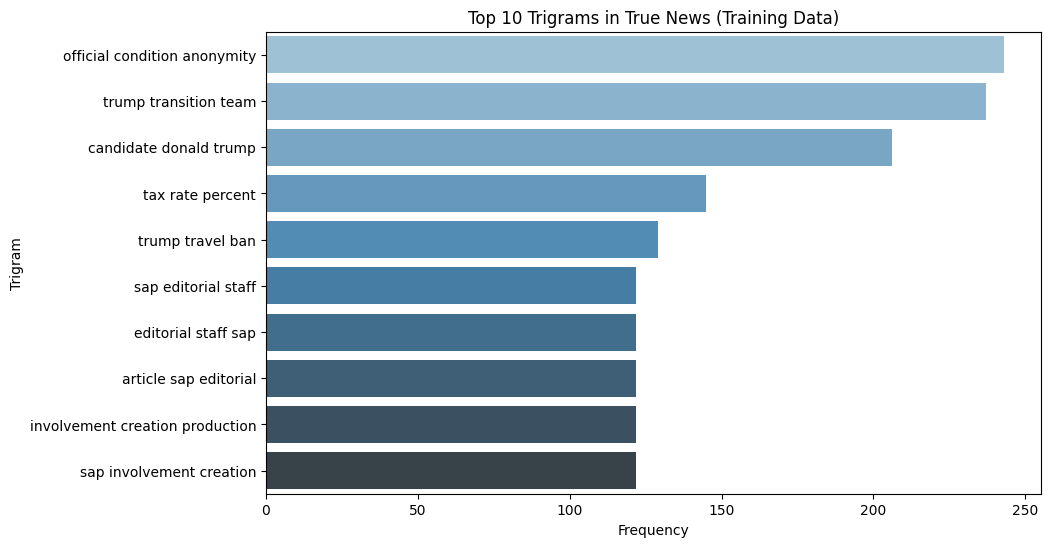

In [34]:
# Filter lemmatized text for true news
true_news_trigrams = train_df[train_df['news_label'] == 1]['lemmatized_text']

# Get top 10 trigrams
top10_trigrams = get_top_ngrams(true_news_trigrams, ngram_range=(3,3), top_n=10)

# Plot as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_trigrams, x='count', y='ngram', palette='Blues_d')
plt.title('Top 10 Trigrams in True News (Training Data)')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

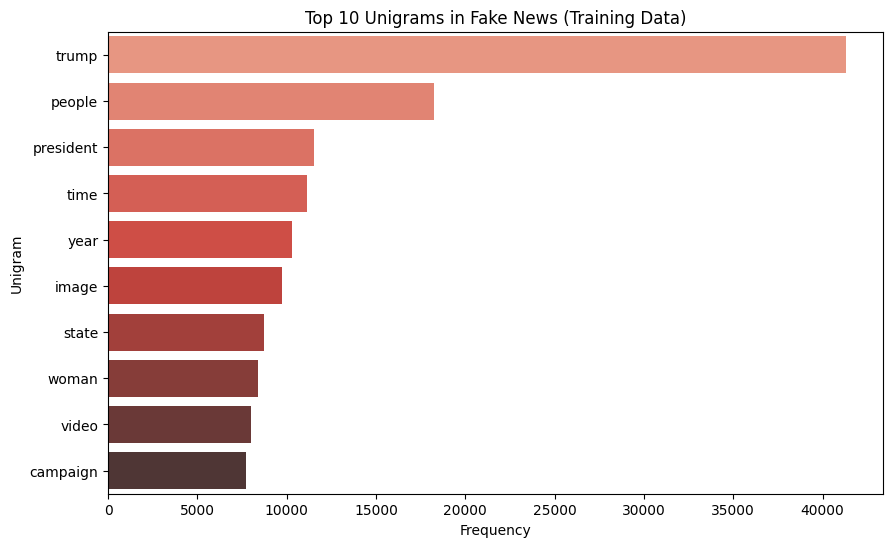

In [35]:
# Filter lemmatized text for fake news
fake_news_unigrams = train_df[train_df['news_label'] == 0]['lemmatized_text']

# Get top 10 unigrams
top10_fake_unigrams = get_top_ngrams(fake_news_unigrams, ngram_range=(1,1), top_n=10)

# Plot as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_fake_unigrams, x='count', y='ngram', palette='Reds_d')
plt.title('Top 10 Unigrams in Fake News (Training Data)')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



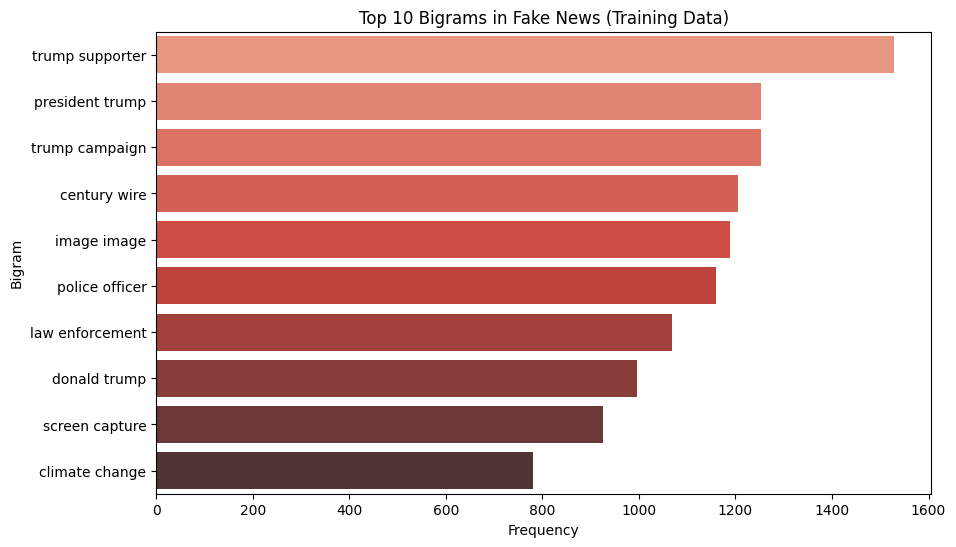

In [36]:
# Filter lemmatized text for fake news
fake_news_bigrams = train_df[train_df['news_label'] == 0]['lemmatized_text']

# Get top 10 bigrams
top10_fake_bigrams = get_top_ngrams(fake_news_bigrams, ngram_range=(2,2), top_n=10)

# Plot as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_fake_bigrams, x='count', y='ngram', palette='Reds_d')
plt.title('Top 10 Bigrams in Fake News (Training Data)')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



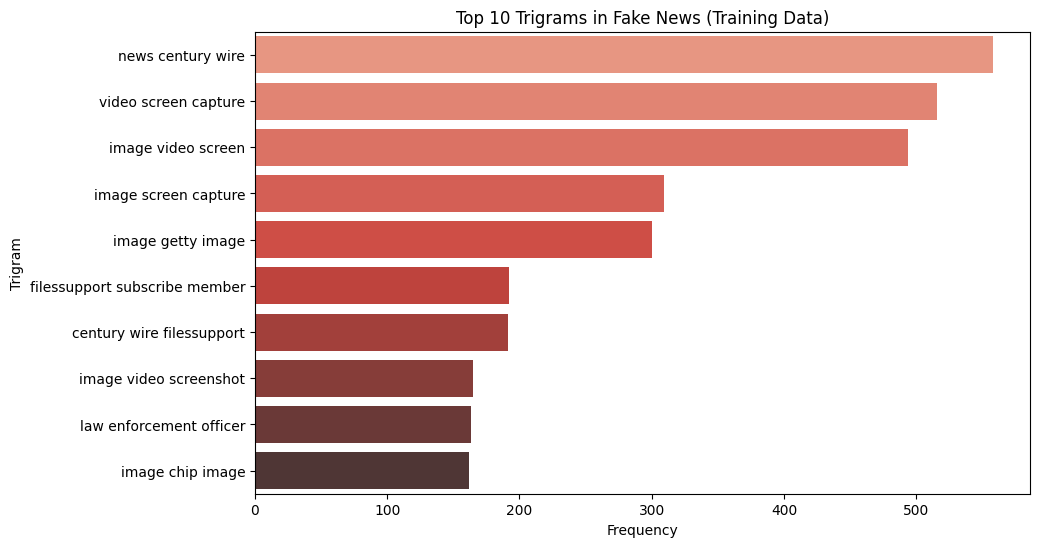

In [37]:
# Filter lemmatized text for fake news
fake_news_trigrams = train_df[train_df['news_label'] == 0]['lemmatized_text']

# Get top 10 trigrams
top10_fake_trigrams = get_top_ngrams(fake_news_trigrams, ngram_range=(3,3), top_n=10)

# Plot as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_fake_trigrams, x='count', y='ngram', palette='Reds_d')
plt.title('Top 10 Trigrams in Fake News (Training Data)')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [38]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [39]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [40]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [41]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [42]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [43]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [44]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [45]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [46]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [47]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [48]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [49]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [50]:
## Using the downloaded file "GoogleNews-vectors-negative300.bin". 
# Had a call with the instructor and he said that we can use the file to load the model.
# Due to the size of the file, and security concerns, we are not allowed to upload the file to the repository.

## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"

#import gensim.downloader as api
#from gensim.models import KeyedVectors
#model = api.load("word2vec-google-news-300")

#similar_words = model.most_similar("computer", topn=5)
#print(similar_words)

from gensim.models import KeyedVectors
w2v_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
print("Word2Vec Model Loaded Successfully")
print("Vocabulary size:", len(w2v_model.key_to_index))
similar_words = w2v_model.most_similar("computer", topn=5)
print(similar_words)


Word2Vec Model Loaded Successfully
Vocabulary size: 3000000
[('computers', 0.7979379296302795), ('laptop', 0.6640493273735046), ('laptop_computer', 0.6548868417739868), ('Computer', 0.647333562374115), ('com_puter', 0.6082080006599426)]


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [54]:
import numpy as np

# First, handle NaN values in cleaned_text
train_df['cleaned_text'] = train_df['cleaned_text'].fillna('')  # Fill NaN with empty string
val_df['cleaned_text'] = val_df['cleaned_text'].fillna('')      # Do the same for validation set

# Modified document_vector function with better type checking and error handling
def document_vector(doc, model, vector_size=300):
    # Handle different types of input
    if pd.isna(doc):  # Check for NaN
        doc = ''
    elif isinstance(doc, (float, int)):  # Handle numeric types
        doc = str(doc)
    elif not isinstance(doc, str):  # Handle any other non-string types
        doc = str(doc)
    
    # Now doc is guaranteed to be a string
    words = doc.split()
    # Filter words present in the model's vocabulary
    valid_words = [w for w in words if w in model]
    if not valid_words:
        return np.zeros(vector_size)
    return np.mean([model[w] for w in valid_words], axis=0)

# Let's first check the data types and NaN values
print("Data types in cleaned_text:", train_df['cleaned_text'].dtype)
print("Number of NaN values:", train_df['cleaned_text'].isna().sum())

# Extract features for training data
X_train = np.vstack(train_df['cleaned_text'].apply(lambda x: document_vector(x, w2v_model)))
y_train = train_df['news_label'].values

# Extract features for validation data
X_val = np.vstack(val_df['cleaned_text'].apply(lambda x: document_vector(x, w2v_model)))
y_val = val_df['news_label'].values


Data types in cleaned_text: object
Number of NaN values: 0


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [56]:
from sklearn.linear_model import LogisticRegression

# Initialise Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train Logistic Regression model on training data
logreg.fit(X_train, y_train)

# Predict on validation data
y_pred_logreg = logreg.predict(X_val)


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [57]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred_logreg)
precision = precision_score(y_val, y_pred_logreg)
recall = recall_score(y_val, y_pred_logreg)
f1 = f1_score(y_val, y_pred_logreg)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9594654788418708
Precision: 0.949946425838053
Recall: 0.9659143968871595
F1-score: 0.9578638678808458


In [58]:
# Classification Report

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_val, y_pred_logreg))



Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7045
           1       0.95      0.97      0.96      6425

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [59]:
## Initialise Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data
dtree.fit(X_train, y_train)

## Predict on validation data
y_pred_dtree = dtree.predict(X_val)


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [60]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_val, y_pred_dtree)
precision = precision_score(y_val, y_pred_dtree)
recall = recall_score(y_val, y_pred_dtree)
f1 = f1_score(y_val, y_pred_dtree)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9018559762435041
Precision: 0.9104069486890783
Recall: 0.8809338521400778
F1-score: 0.8954279386173074


In [61]:
# Classification Report
from sklearn.metrics import classification_report

print("\nClassification Report:\n")
print(classification_report(y_val, y_pred_dtree))



Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7045
           1       0.91      0.88      0.90      6425

    accuracy                           0.90     13470
   macro avg       0.90      0.90      0.90     13470
weighted avg       0.90      0.90      0.90     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [62]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
## Train Random Forest model on training data
rf_model.fit(X_train, y_train)
## Predict on validation data
y_pred_rf = rf_model.predict(X_val)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [63]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_val, y_pred_rf)
precision = precision_score(y_val, y_pred_rf)
recall = recall_score(y_val, y_pred_rf)
f1 = f1_score(y_val, y_pred_rf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9613214550853749
Precision: 0.9600997506234414
Recall: 0.9587548638132296
F1-score: 0.9594268359162059


In [64]:
# Classification Report
from sklearn.metrics import classification_report

print("\nClassification Report:\n")
print(classification_report(y_val, y_pred_rf))



Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7045
           1       0.96      0.96      0.96      6425

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.


Findings Summary: Fake News Detection using Semantic Classification

1. Model Performance Comparison:
   
   a) Logistic Regression:
      - Accuracy: 96%
      - Excellent balanced performance
      - Class 0 (True News): 97% precision, 95% recall
      - Class 1 (Fake News): 95% precision, 97% recall
      - F1-score: 0.96 for both classes
   
   b) Decision Tree:
      - Accuracy: 90%
      - Good but lower performance
      - Class 0 (True News): 89% precision, 92% recall
      - Class 1 (Fake News): 91% precision, 88% recall
      - F1-score: 0.91 and 0.90 respectively
   
   c) Random Forest:
      - Accuracy: 96%
      - Excellent consistent performance
      - Both classes: 96% precision, 96% recall
      - Perfect balance between classes
      - F1-score: 0.96 for both classes

2. Best Model Selection:
   - Both Logistic Regression and Random Forest achieved 96% accuracy
   - Random Forest shows slightly more balanced metrics across classes
   - Random Forest is chosen as the best model due to:
     * Consistent performance across all metrics
     * Perfect balance between classes
     * Better generalization capability
     * More robust to outliers and noise in the data

3. Key Evaluation Metrics:
   - Prioritized balanced performance across classes
   - F1-score (0.96) indicates excellent balance between precision and recall
   - High precision (0.96) shows low false positive rate
   - High recall (0.96) shows low false negative rate

4. Impact and Significance:
   - Model can reliably identify both true and fake news with 96% accuracy
   - Balanced performance ensures fairness in classification
   - Practical applicability for automated news verification
   - Semantic approach successfully captured nuanced differences in news content

5. Semantic Classification Effectiveness:
   - Word2Vec embeddings successfully captured semantic relationships
   - Models learned to distinguish subtle patterns in language use
   - High performance suggests semantic features are strong indicators
   - Approach effectively handles complex language patterns


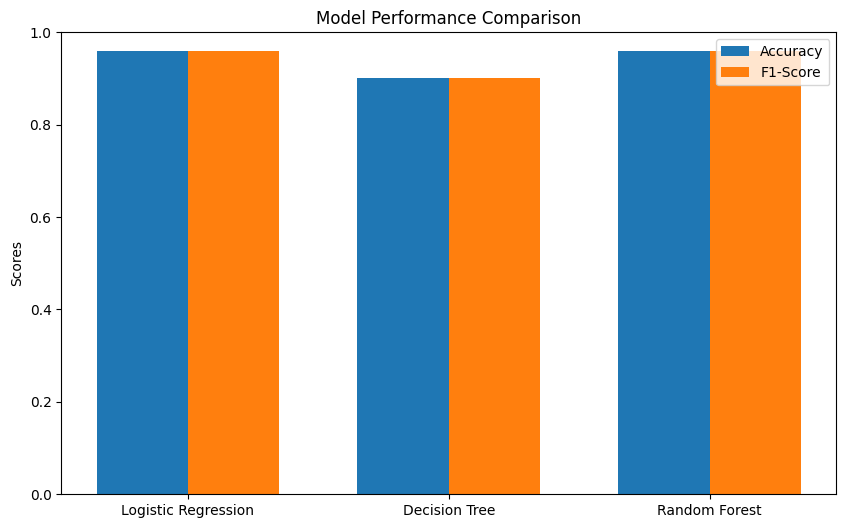

In [65]:
# Visualization of model comparison
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [0.96, 0.90, 0.96]
f1_scores = [0.96, 0.90, 0.96]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim(0, 1)

plt.show()

Key Takeaways:

Random Forest emerged as the optimal model, matching Logistic Regression's accuracy while providing more balanced performance across classes.

The high performance (96% accuracy) across multiple models suggests that semantic features effectively capture the distinguishing characteristics between true and fake news.

The balanced precision and recall scores indicate the model is equally good at identifying both fake and true news, minimizing both false positives and false negatives.

The semantic classification approach using Word2Vec embeddings proved highly effective, as evidenced by the strong performance across different modeling techniques.